In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

cssurl = 'http://j.mp/1DnuN9M'
display_html(urlopen(cssurl).read(), raw=True)

# Tarea 6

## Simulación de un sistema con retardo por medio de la construcción de una Matriz de Lyapunov

Dado el sistema:

$$
\dot{x}(t) = A_0 x(t) + A_1 x(t - \tau)
$$

proponemos una solución de la forma $x(t) = U(\tau)$ con $U(\tau)$ de la forma:

$$
U(\tau) = \int_0^{\infty} K^T(t) W K(t + \tau) dt
$$

Solución que sabemos satisface la condición dinámica del sistema:

$$
\frac{d U(\tau)}{d \tau} = U(\tau) A_0 + U(\tau - h) A_1
$$

la cual, para un tiempo negativo sería:

$$
\frac{d U(- \tau)}{d \tau} = U(- \tau) A_0 + U(- \tau - h) A_1
$$

asi como la propiedad simetrica:

$$
U(-\tau) = U^T(\tau) \quad \tau \geq 0 
$$

por lo que tenemos que la propiedad dinámica del sistema queda:

$$
\frac{d U(\tau)}{d \tau} = -A_0^T U(\tau) - A_1^T U(\tau + h)
$$

o bien:

$$
\frac{d U(\tau - h)}{d \tau} = -A_0^T U(\tau - h) - A_1^T U(\tau)
$$

En este punto introducimos dos variables auxiliares, $Y(\tau) = U(\tau)$ y $Z(\tau) = U(\tau - h)$, para expresar la condición dinámica del sistema y esta ultiima expresión en forma de un sistema acoplado:

$$
\frac{d Y(\tau)}{d \tau} = Y(\tau) A_0 + Z(\tau) A_1
$$

$$
\frac{d Z(\tau)}{d \tau} = -A_1^T Y(\tau) - A_0^T Z(\tau)
$$

en donde notamos que tenemos un sistema sin retardos explicitos, por lo que podemos utilizar tecnicas convencionales para el analisis de este sistema, mas aun, podemos construir una matriz que de el comportamiento de este sistema acoplado.

Para poder lograr esto, primero tenemos que hablar de la vectorización de una matriz y del producto de Kronecker; dada una matriz $A$ de la forma:

$$
A =
\begin{pmatrix}
a_1 & a_2 & \dots & a_n
\end{pmatrix}
$$

en donde $a_1, a_2, \dots, a_n$ son las columnas de $A$ definimos la vectorización de $A$ como:

<div style="display:none">
  $\DeclareMathOperator{\vect}{vec}$
</div>

$$
\vect{(A)} =
\begin{pmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{pmatrix}
$$

es decir, un vector en donde todas las columnas se colocan consecutivamente en la primera.

Dada esta definición, podemos decir que una manera de simplificar la vectorización de un producto es:

$$
\vect{(AXB)} = (B^T \otimes A) \vect{(X)}
$$

en donde $\otimes$ es el producto de Kronecker y se define como:

$$
A \otimes B =
\begin{pmatrix}
a_{11} B & a_{12} B & \dots & a_{1n} B \\
a_{21} B & a_{22} B & \dots & a_{2n} B \\
\vdots & \vdots & & \vdots \\
a_{n1} B & a_{n2} B & \dots & a_{nn} B \\
\end{pmatrix}
$$

El sistema acoplado que obtuvimos es equivalente a:

$$
\frac{d Y(\tau)}{d \tau} = I Y(\tau) A_0 + I Z(\tau) A_1
$$

$$
\frac{d Z(\tau)}{d \tau} = -A_1^T Y(\tau) I - A_0^T Z(\tau) I
$$

por lo que al vectorizar estas expresiones, obtendremos:

$$
\frac{d \bar{Y}(\tau)}{d \tau} = \left( A_0^T \otimes I \right) \bar{Y}(\tau) + \left( A_1^T \otimes I \right) \bar{Z}(\tau)
$$

$$
\frac{d \bar{Z}(\tau)}{d \tau} = - \left( I \otimes A_1^T \right) \bar{Y}(\tau) - \left( I \otimes A_0^T \right) \bar{Z}(\tau)
$$

o bien:

$$
\frac{d}{d\tau}
\begin{pmatrix}
\bar{Y}(\tau) \\
\bar{Z}(\tau)
\end{pmatrix} =
\begin{pmatrix}
A_0^T \otimes I & A_1^T \otimes I \\
-I \otimes A_1^T & -I \otimes A_0^T
\end{pmatrix}
\begin{pmatrix}
\bar{Y}(\tau) \\
\bar{Z}(\tau)
\end{pmatrix}
$$

lo que sugiere una solución de la forma:

$$
\begin{pmatrix}
\bar{Y}(\tau) \\
\bar{Z}(\tau)
\end{pmatrix} = e^{L \tau}
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix}
$$

en donde $L$ es la matriz de Lyapunov, de la forma:

$$
L =
\begin{pmatrix}
A_0^T \otimes I & A_1^T \otimes I \\
-I \otimes A_1^T & -I \otimes A_0^T
\end{pmatrix}
$$

Ahora consideremos las condiciones iniciales, asi como la propiedad algebraica del sistema:

$$
U(0) A_0 + U(-h) A_1 + A_0^T U(0) + A_1^T U(h) = -W
$$

notando que las condiciones iniciales para $U$ se traducen en:

$$
Y(0) = U(0) \quad Z(0) = U(-h) \quad Y(h) = U(h)
$$

podemos reescribir esta propiedad como:

$$
Y(0) A_0 + Z(0) A_1 + A_0^T Y(0) + A_1^T Y(h) = -W
$$

vectorizando, esto nos queda:

$$
\left( A_0^T \otimes I \right) \bar{Y}(0) + \left( A_1^T \otimes I \right) \bar{Z}(0) + \left( I \otimes A_0^T \right) \bar{Y}(0) + \left( I \otimes A_1^T \right) \bar{Y}(h) = -\bar{W}
$$

A esta ecuación le agregamos la vectorización de una condición inicial dada ya:

$$
\bar{Y}(h) - \bar{Z}(h) = \bar{0}
$$

y tenemos que este sistema acoplado puede ser escrito como:

$$
\begin{align}
\begin{pmatrix}
A_0^T \otimes I + I \otimes A_0^T & A_1^T \otimes I \\
I \otimes I & 0 \otimes 0
\end{pmatrix}
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} &+ \\
\begin{pmatrix}
I \otimes A_1^T & 0 \otimes 0 \\
0 \otimes 0 & -I \otimes I
\end{pmatrix}
\begin{pmatrix}
\bar{Y}(h) \\
\bar{Z}(h)
\end{pmatrix} &=
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
\end{align}
$$

o bien:

$$
M
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} + N
\begin{pmatrix}
\bar{Y}(h) \\
\bar{Z}(h)
\end{pmatrix} =
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
$$

con

$$
M =
\begin{pmatrix}
A_0^T \otimes I + I \otimes A_0^T & A_1^T \otimes I \\
I \otimes I & 0 \otimes 0
\end{pmatrix}
$$

$$
N =
\begin{pmatrix}
I \otimes A_1^T & 0 \otimes 0 \\
0 \otimes 0 & -I \otimes I
\end{pmatrix}
$$

aun más, vemos que el termino $\begin{pmatrix} \bar{Y}(h) \\ \bar{Z}(h) \end{pmatrix}$ se puede obtener con el resultado anterior:

$$
\begin{pmatrix}
\bar{Y}(h) \\
\bar{Z}(h)
\end{pmatrix} = e^{L h}
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix}
$$

por lo que al sustituir en esta expresión, tenemos:

$$
M
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} + N e^{L h}
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} =
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
$$

$$
\left( M + N e^{L h} \right)
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} =
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
$$

$$
\begin{pmatrix}
\bar{Y}(0) \\
\bar{Z}(0)
\end{pmatrix} =
\left( M + N e^{L h} \right)^{-1}
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
$$

Esta expresión la podemos sustituir en la original y obtener:

$$
\begin{pmatrix}
\bar{Y}(\tau) \\
\bar{Z}(\tau)
\end{pmatrix} = e^{L \tau} \left( M + N e^{L h} \right)^{-1}
\begin{pmatrix}
- \bar{W} \\
\bar{0}
\end{pmatrix}
$$

Para esta simulación utilizaremos los siguientes valores:

$$
A_0 =
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix} \quad
A_1 =
\begin{pmatrix}
-2 & 0 \\
0.3 & 0
\end{pmatrix} \quad W = I \quad \tau \in [0, 1]
$$

Declaramos estas matrices, asi como una matriz de ceros, la identidad y las vectorizaciones de una matriz de ceros, asi como la de la matriz $W$.

In [1]:
from numpy import array, matrix, kron, eye, zeros, vstack, hstack, linspace
from scipy.linalg import expm

In [2]:
A0 = matrix([[0, 1], [-1, 0]])
A0

matrix([[ 0,  1],
        [-1,  0]])

In [3]:
A1 = matrix([[-2, 0], [0.3, 0]])
A1

matrix([[-2. ,  0. ],
        [ 0.3,  0. ]])

In [4]:
I = matrix(eye(2))
I

matrix([[ 1.,  0.],
        [ 0.,  1.]])

In [5]:
cero = zeros((2**2, 2**2))
cero

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [6]:
v0 = matrix(zeros(4))
v0

matrix([[ 0.,  0.,  0.,  0.]])

In [7]:
W = I
W.flatten("F")

matrix([[ 1.,  0.,  0.,  1.]])

Ahora calculamos la matriz de Lyapunov, asi como las matrices $M$ y $N$

In [8]:
L = vstack((hstack((kron(A0.T, I), kron(A1.T, I))),
        hstack((kron(-I, A1.T), kron(-I, A0.T)))))
L

matrix([[ 0. ,  0. , -1. , -0. , -2. , -0. ,  0.3,  0. ],
        [ 0. ,  0. , -0. , -1. , -0. , -2. ,  0. ,  0.3],
        [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 2. , -0.3,  0. , -0. , -0. ,  1. , -0. ,  0. ],
        [-0. , -0. , -0. , -0. , -1. , -0. , -0. , -0. ],
        [ 0. , -0. ,  2. , -0.3, -0. ,  0. , -0. ,  1. ],
        [-0. , -0. , -0. , -0. , -0. , -0. , -1. , -0. ]])

In [11]:
M = vstack((hstack((kron(A0.T, I) + kron(I, A0.T), kron(A1.T, I))),
            hstack((kron(I, I), cero))))
M

matrix([[ 0. , -1. , -1. , -0. , -2. , -0. ,  0.3,  0. ],
        [ 1. ,  0. ,  0. , -1. , -0. , -2. ,  0. ,  0.3],
        [ 1. ,  0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ]])

In [12]:
N = vstack((hstack((kron(I, A1.T), cero)),
            hstack((cero, kron(-I, I)))))
N

matrix([[-2. ,  0.3, -0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0. ,  0. , -2. ,  0.3,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -1. , -0. , -0. , -0. ],
        [ 0. ,  0. ,  0. ,  0. , -0. , -1. , -0. , -0. ],
        [ 0. ,  0. ,  0. ,  0. , -0. , -0. , -1. , -0. ],
        [ 0. ,  0. ,  0. ,  0. , -0. , -0. , -0. , -1. ]])

In [13]:
v = vstack((- W.flatten("F").T, v0.T))
v

matrix([[-1.],
        [-0.],
        [-0.],
        [-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]])

Ahora declaramos la función $f(\tau)$ la cual es de la forma:

$$
f(\tau) := e^{L \tau} \left( M + N e^{L h} \right)^{-1}
\begin{pmatrix}
\bar{0} \\
\bar{W}
\end{pmatrix}
$$

con la que podremos calcular los valores de:

$$
\begin{pmatrix}
\bar{Y}(\tau) \\
\bar{Z}(\tau)
\end{pmatrix}
$$

para cada $\tau$ que le demos como argumento:

In [14]:
h = 1
f = lambda tau: (expm(L*tau)*(M + N*expm(L*h)).I*v).flatten().tolist()[0]

utilizamos $h = \frac{1}{2}$ para probar nuestra función: 

In [15]:
# Fijamos la precision de los datos mostrados a 3 cifras significativas
# para facilitar la lectura

%precision 3

u'%.3f'

In [16]:
tau = 0.5
v1 = f(tau)
v1

[-0.309, -0.127, -0.750, 1.018, -0.309, -0.750, -0.127, 1.018]

y para un incremento en el retardo de $\frac{1}{10}$, tenemos:

In [17]:
v2 = f(tau + 0.1)
v2

[-0.163, -0.051, -0.774, 1.009, -0.427, -0.713, -0.208, 1.035]

por lo que solo queda declarar el dominio de definición de los retardos:

$$
T = [0, 1]
$$

y obtener el conjunto de soluciones para cada retardo en el dominio definido:

$$
V_{sol}= \left\{ f(t) \mid t \in T \right\} 
$$

In [18]:
T = linspace(0, 1, 1000)
vsol = [f(t) for t in T]

In [19]:
sol = zip(*vsol)

Ahora solo queda graficar la soluciónes contra los retardos del sistema.

In [20]:
%matplotlib inline
from matplotlib.pyplot import plot, figure, style, legend
style.use("ggplot")

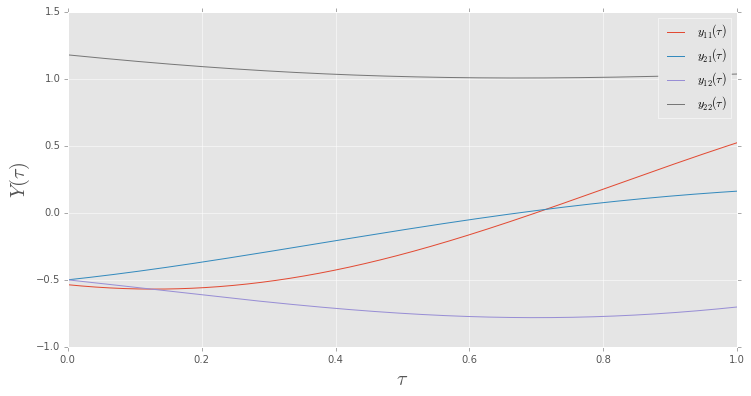

In [21]:
fig = figure(figsize=(12, 6))

p1, = plot(T, sol[0])
p2, = plot(T, sol[1])
p3, = plot(T, sol[2])
p4, = plot(T, sol[3])

ax = fig.gca()
ax.set_ylabel(r"$Y(\tau)$", fontsize=20)
ax.set_xlabel(r"$\tau$", fontsize=20)

legend([p1, p2, p3, p4],
       [r"$y_{11}(\tau)$",
        r"$y_{21}(\tau)$",
        r"$y_{12}(\tau)$",
        r"$y_{22}(\tau)$"]);

Puedes acceder a este notebook a traves de la página

http://bit.ly/1CccnJ9

o escaneando el siguiente código:

![Codigo](codigos/codigo6.jpg)

In [22]:
# Codigo para generar codigo :)
from qrcode import make
img = make("http://bit.ly/1CccnJ9")
img.save("codigos/codigo6.jpg")